In [1]:
install.packages('gamlss')
install.packages('mgcv')
install.packages('gamlss.add')


The downloaded binary packages are in
	/var/folders/s_/h1m8_0ws6zj2648yyx44vd640000gn/T//RtmphAspGF/downloaded_packages

The downloaded binary packages are in
	/var/folders/s_/h1m8_0ws6zj2648yyx44vd640000gn/T//RtmphAspGF/downloaded_packages

The downloaded binary packages are in
	/var/folders/s_/h1m8_0ws6zj2648yyx44vd640000gn/T//RtmphAspGF/downloaded_packages


In [2]:
library(gamlss)
library(MASS)
library(survival)
library("fitdistrplus")
library(logspline)
library(fitdistrplus)
library(corrplot)
library(gamlss.add)
library("mgcv")
library("nnet")
library("fBasics")

Loading required package: splines

Loading required package: gamlss.data


Attaching package: ‘gamlss.data’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: gamlss.dist

Loading required package: MASS

Loading required package: nlme

Loading required package: parallel

 **********   GAMLSS Version 5.3-4  ********** 

For more on GAMLSS look at https://www.gamlss.com/

Type gamlssNews() to see new features/changes/bug fixes.


corrplot 0.88 loaded

Loading required package: mgcv

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required package: nnet


Attaching package: ‘nnet’


The following object is masked from ‘package:mgcv’:

    multinom


Loading required package: rpart

Loading required package: timeDate

Loading required package: timeSeries


Attaching package: ‘fBasics’


The following object is masked from ‘package:gamlss.add’:

    tr




In [3]:
data("dbbmi")

In [4]:
View(dbbmi)

,age,bmi
,<dbl>,<dbl>
1,0.03,13.23529
2,0.04,12.43877
3,0.04,14.54177
4,0.04,11.77395
5,0.04,15.32561
6,0.05,13.21439
8,0.05,16.83447
9,0.05,14.54545
10,0.05,14.29383


In [5]:
old<-15
denew<-subset(dbbmi,age>old & age<old+1,select=c(bmi,age))
BMI<-15
bmi15<-denew$bmi

In [6]:
View(denew)

,bmi,age
,<dbl>,<dbl>
5603,16.35061,15.01
5604,22.02723,15.01
5605,17.53400,15.01
5606,18.29314,15.01
5607,18.31662,15.02
5608,17.78249,15.02
5609,19.75723,15.02
5610,18.22131,15.03
5611,19.90037,15.03


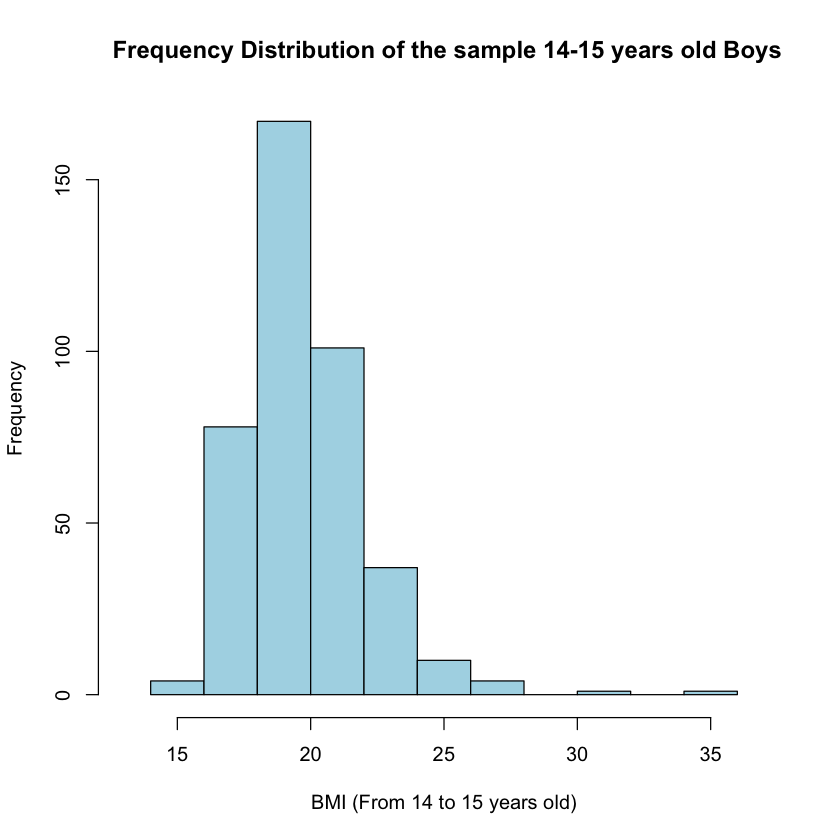

In [7]:
hist(bmi15,xlim=c(13, 37) ,main=" Frequency Distribution of the sample 14-15 years old Boys",
     xlab='BMI (From 14 to 15 years old)',col='lightblue')

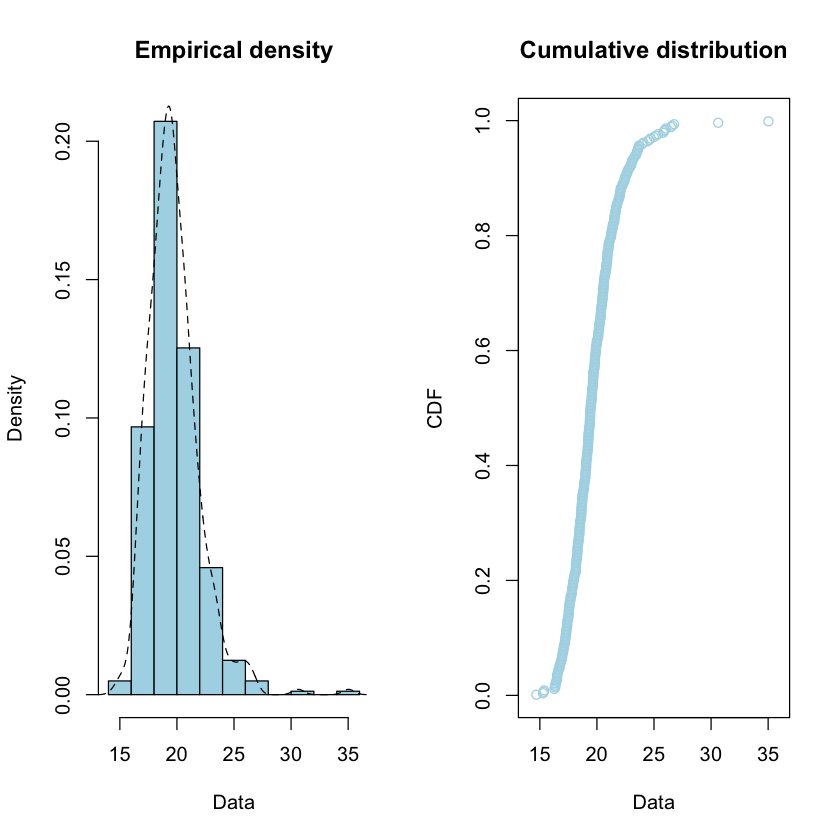

In [8]:
plotdist(denew$bmi,histo=TRUE, demp = TRUE,col='lightblue')

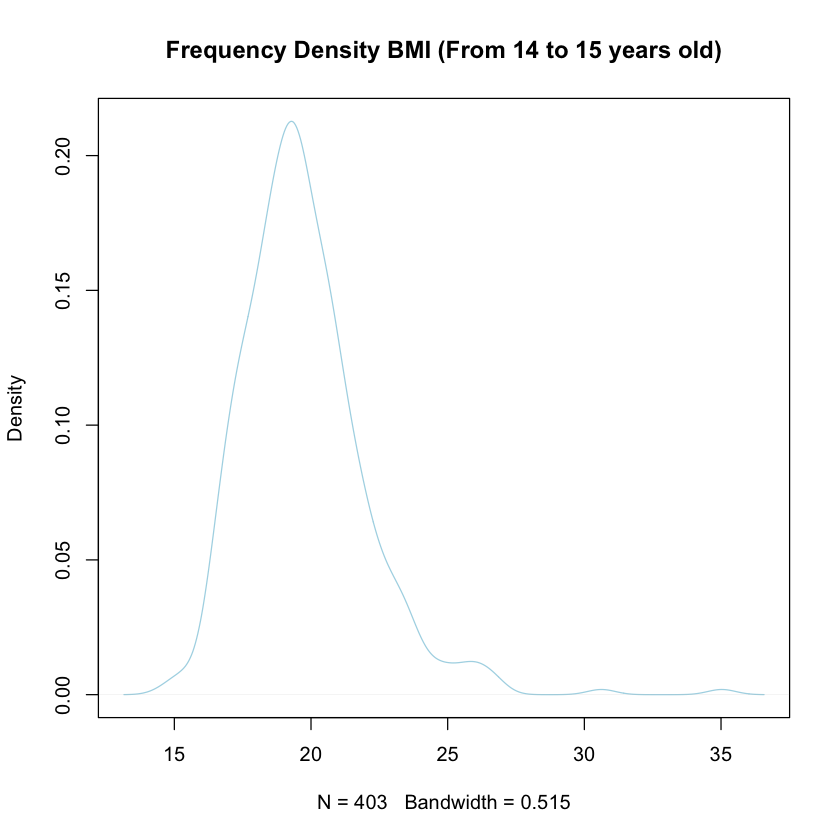

In [9]:
plot(density(bmi15),main="Frequency Density BMI (From 14 to 15 years old)",col='lightblue')

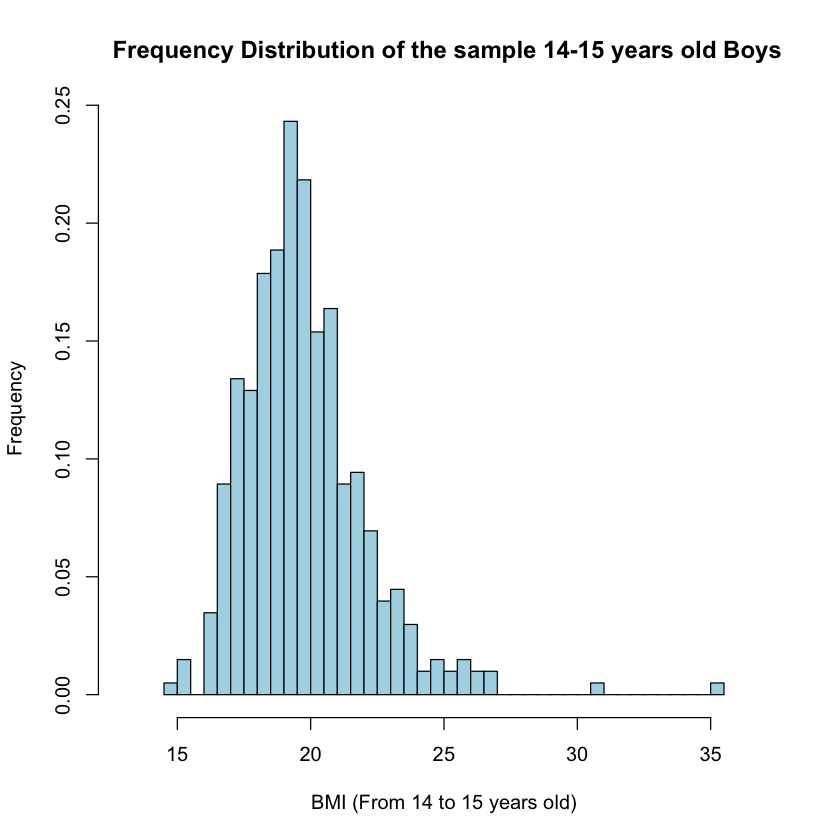

In [10]:
truehist(bmi15,nbins=60,xlim=c(13, 37) ,
         main=" Frequency Distribution of the sample 14-15 years old Boys",
         xlab='BMI (From 14 to 15 years old)',col='lightblue',ylab="Frequency")

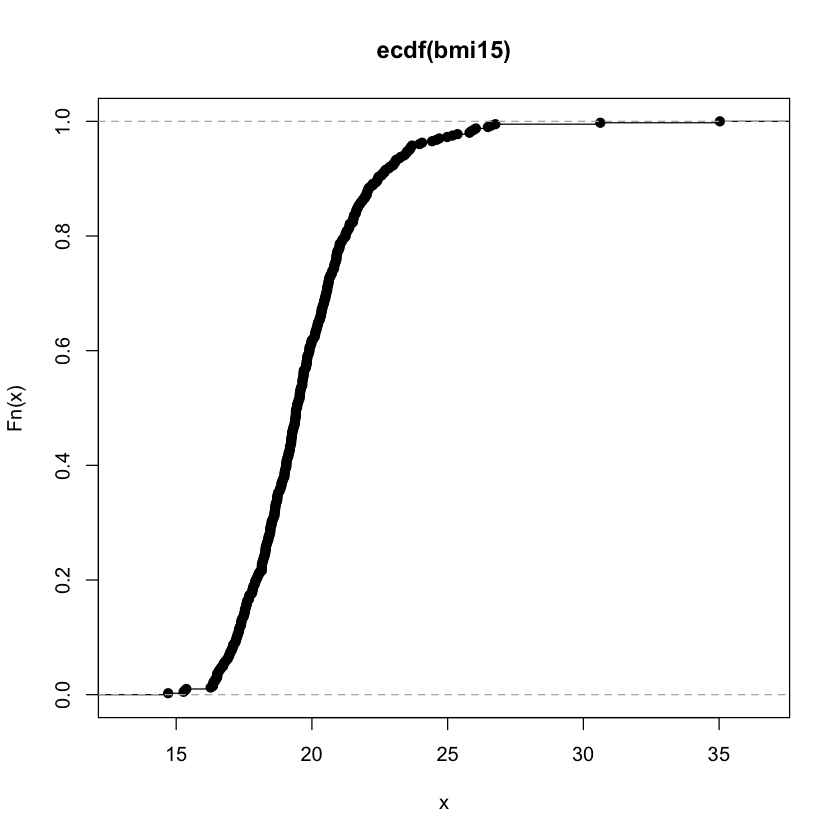

In [11]:
bmi.ecdf=ecdf(bmi15)
plot(bmi.ecdf)

[1] 19.74887

[1] 5.148273

[1] 1.515736

[1] 1.510098
attr(,"method")
[1] "moment"

[1] 9.019772

[1] 8.975065
attr(,"method")
[1] "moment"

summary statistics
------
min:  14.70352   max:  35.02733 
median:  19.45312 
mean:  19.74887 
sample sd:  2.266164 
sample skewness:  1.515736 
sample kurtosis:  9.019772 

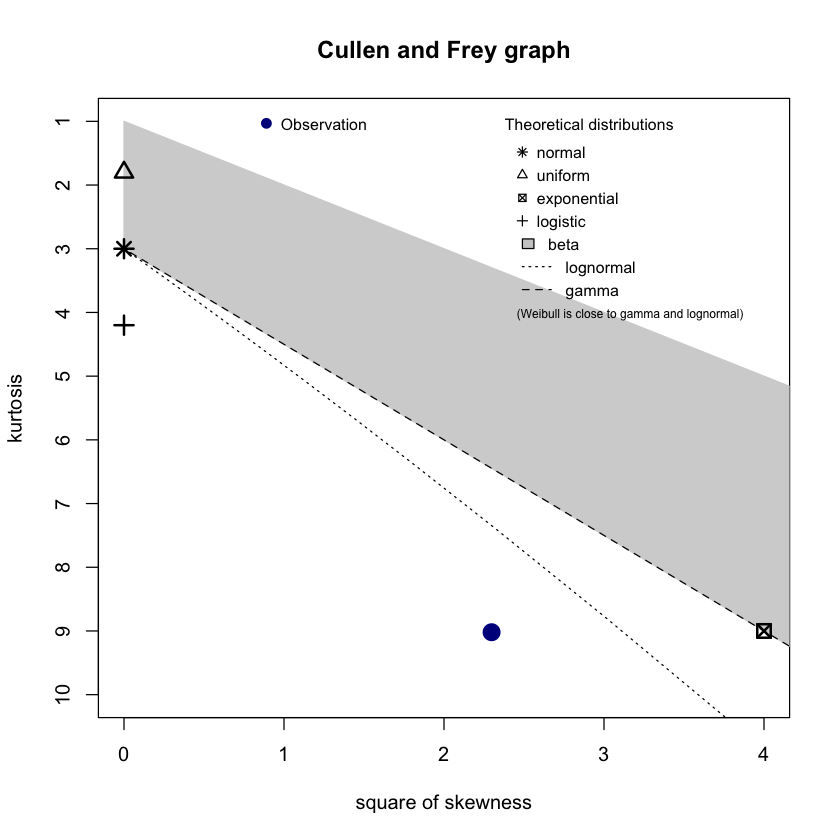

summary statistics
------
min:  14.70352   max:  35.02733 
median:  19.45312 
mean:  19.74887 
sample sd:  2.266164 
sample skewness:  1.515736 
sample kurtosis:  9.019772 

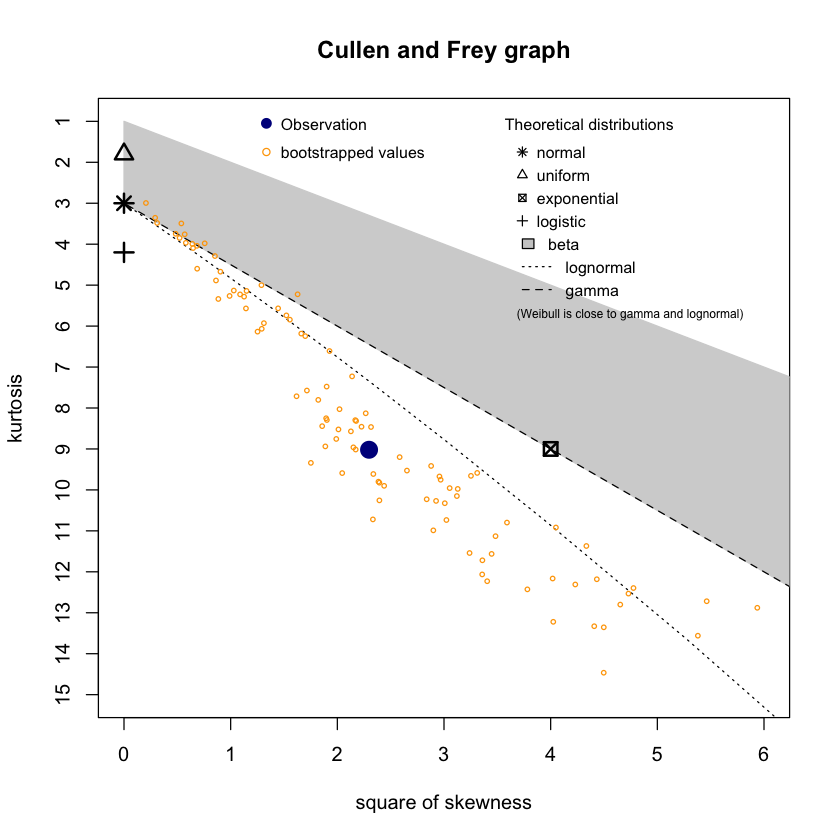

In [12]:
mean(bmi15)
var(bmi15)

moments::skewness(bmi15,na.rm = TRUE)
skewness(bmi15,na.rm = TRUE,method='moment')

moments::kurtosis(bmi15,na.rm = TRUE)
kurtosis(bmi15,na.rm = TRUE, method='moment')

descdist(bmi15,method='sample')
descdist(bmi15,boot=100,method='sample')

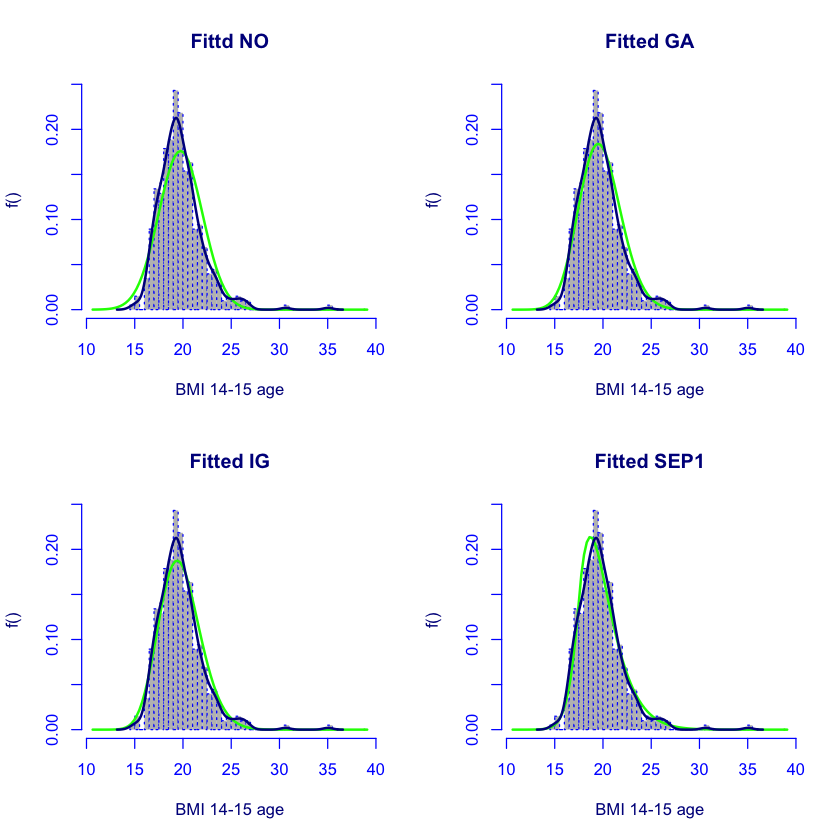

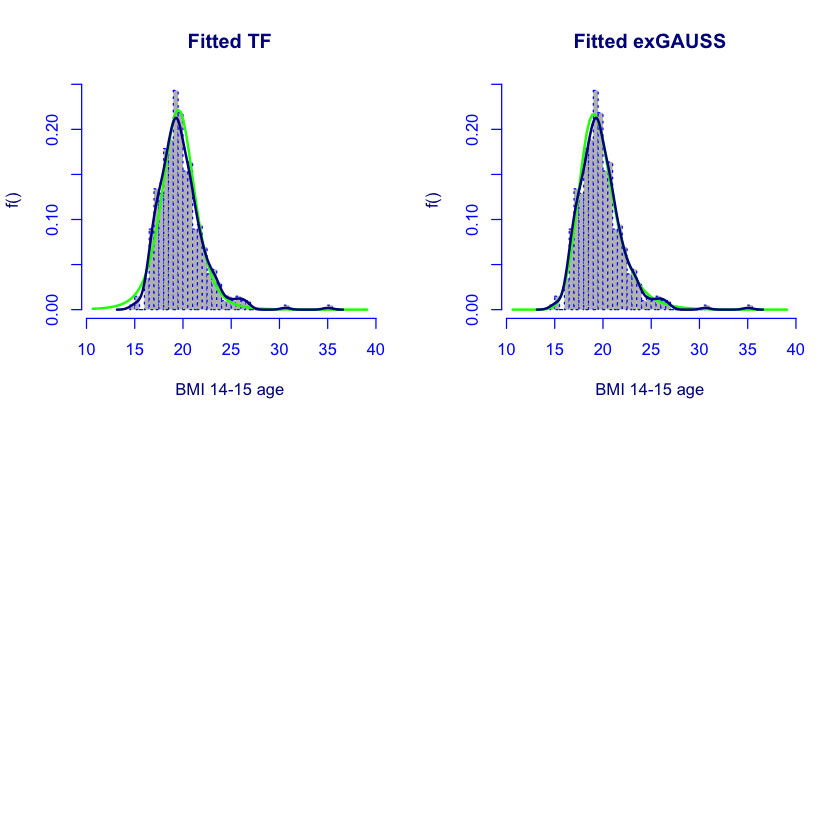

In [13]:
op<-par(mfrow=c(2,2))
mNO<-histDist(bmi15,"NO",density=TRUE,main=("Fittd NO"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mGA<-histDist(bmi15,"GA",density=TRUE,main=("Fitted GA"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mIG<-histDist(bmi15,"IG",density=TRUE,main=("Fitted IG"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mSEP1<-histDist(bmi15,"SEP1",density=TRUE,main=("Fitted SEP1"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mTF<-histDist(bmi15,"TF",density=TRUE,main=("Fitted TF"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mexGAUS<-histDist(bmi15,"exGAUS",density=TRUE,main=("Fitted exGAUSS"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
par(op)

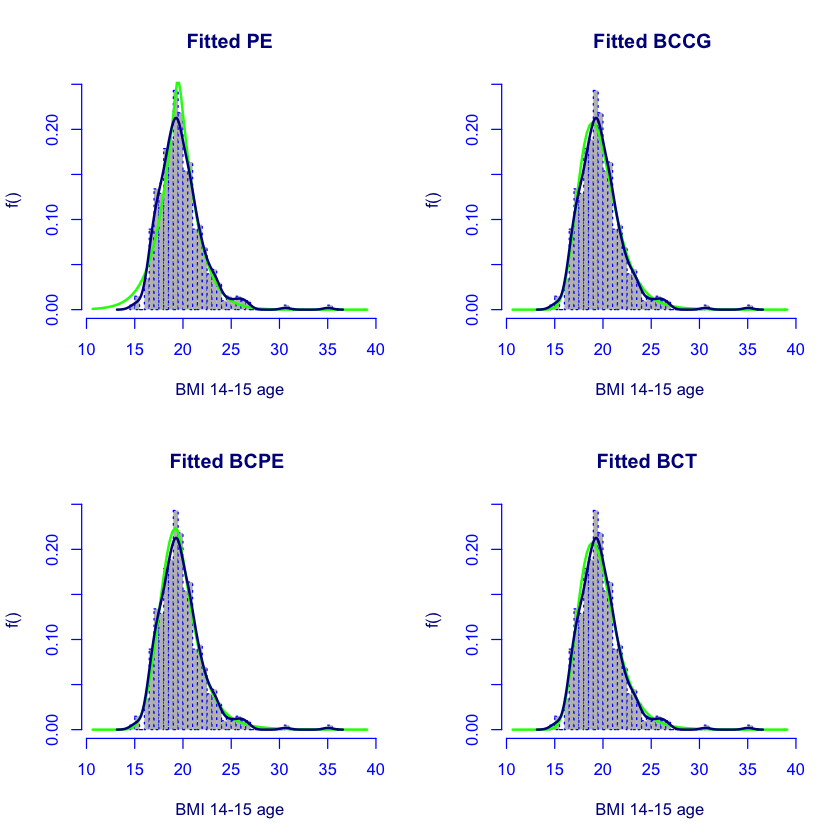

In [14]:
op<-par(mfrow=c(2,2))
mPE<-histDist(bmi15,"PE",density=TRUE,main=("Fitted PE"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mBCCG<-histDist(bmi15,"BCCG",density=TRUE,main=(" Fitted BCCG"),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mBCPE<-histDist(bmi15,"BCPE",density=TRUE,main=("Fitted BCPE "),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
mBCT<-histDist(bmi15,"BCCG",density=TRUE,main=("Fitted BCT "),nbins=60,ymax=00.5,xlab='BMI 14-15 age',line.col=c("green",'blue4'),line.ty =c(1, 1))
par(op)

In [15]:
mNo<-gamlss(bmi15~age,data=denew,family="NO")

GAMLSS-RS iteration 1: Global Deviance = 1799.973 
GAMLSS-RS iteration 2: Global Deviance = 1799.973 


In [16]:
#The gamma distribution is appropriate for positively skew data
mGa<-gamlss(bmi15~age,data=denew,family="GA")

GAMLSS-RS iteration 1: Global Deviance = 1764.708 
GAMLSS-RS iteration 2: Global Deviance = 1764.708 


In [17]:
#The inverse Gaussian distribution is appropriate for highly positive skew data
mIg<-gamlss(bmi15~age,data=denew,family="IG")

GAMLSS-RS iteration 1: Global Deviance = 1751.979 
GAMLSS-RS iteration 2: Global Deviance = 1751.979 


In [18]:
#Skew power exp. t1(Parametrization of PE)
mSep1<-gamlss(bmi15~age,data=denew,family="SEP1",n.cyc=60)

GAMLSS-RS iteration 1: Global Deviance = 1756.363 
GAMLSS-RS iteration 2: Global Deviance = 1745.562 
GAMLSS-RS iteration 3: Global Deviance = 1742.295 
GAMLSS-RS iteration 4: Global Deviance = 1740.718 
GAMLSS-RS iteration 5: Global Deviance = 1739.641 
GAMLSS-RS iteration 6: Global Deviance = 1738.997 
GAMLSS-RS iteration 7: Global Deviance = 1738.23 
GAMLSS-RS iteration 8: Global Deviance = 1737.463 
GAMLSS-RS iteration 9: Global Deviance = 1736.77 
GAMLSS-RS iteration 10: Global Deviance = 1736.291 
GAMLSS-RS iteration 11: Global Deviance = 1735.982 
GAMLSS-RS iteration 12: Global Deviance = 1735.693 
GAMLSS-RS iteration 13: Global Deviance = 1735.482 
GAMLSS-RS iteration 14: Global Deviance = 1735.264 
GAMLSS-RS iteration 15: Global Deviance = 1735.08 
GAMLSS-RS iteration 16: Global Deviance = 1734.969 
GAMLSS-RS iteration 17: Global Deviance = 1734.817 
GAMLSS-RS iteration 18: Global Deviance = 1734.648 
GAMLSS-RS iteration 19: Global Deviance = 1734.476 
GAMLSS-RS iteration 20: 

In [19]:
#The t family distribution, TF, is symmetric but able to model leptokurtosis,
mTf<-gamlss(bmi15~age,data=denew,family="TF")

GAMLSS-RS iteration 1: Global Deviance = 1749.529 
GAMLSS-RS iteration 2: Global Deviance = 1746.142 
GAMLSS-RS iteration 3: Global Deviance = 1745.434 
GAMLSS-RS iteration 4: Global Deviance = 1745.28 
GAMLSS-RS iteration 5: Global Deviance = 1745.247 
GAMLSS-RS iteration 6: Global Deviance = 1745.239 
GAMLSS-RS iteration 7: Global Deviance = 1745.238 
GAMLSS-RS iteration 8: Global Deviance = 1745.237 


In [20]:
#The power exponential distribution is suitable for leptokurtic and platykurtic data
mPe<-gamlss(bmi15~age,data=denew,family="PE")

GAMLSS-RS iteration 1: Global Deviance = 1754.013 
GAMLSS-RS iteration 2: Global Deviance = 1751.278 
GAMLSS-RS iteration 3: Global Deviance = 1751.258 
GAMLSS-RS iteration 4: Global Deviance = 1751.257 


In [21]:
#The BCT distribution can model skewness and leptokurtosis 
mBct<-gamlss(bmi15~age,data=denew,family="BCT")

GAMLSS-RS iteration 1: Global Deviance = 1720.843 
GAMLSS-RS iteration 2: Global Deviance = 1719.463 
GAMLSS-RS iteration 3: Global Deviance = 1719.439 
GAMLSS-RS iteration 4: Global Deviance = 1719.438 
GAMLSS-RS iteration 5: Global Deviance = 1719.437 


In [22]:
mexGaus<-gamlss(bmi15~age,data=denew,family="exGAUS")

GAMLSS-RS iteration 1: Global Deviance = 1762.469 
GAMLSS-RS iteration 2: Global Deviance = 1744.548 
GAMLSS-RS iteration 3: Global Deviance = 1733.771 
GAMLSS-RS iteration 4: Global Deviance = 1727.621 
GAMLSS-RS iteration 5: Global Deviance = 1724.45 
GAMLSS-RS iteration 6: Global Deviance = 1722.939 
GAMLSS-RS iteration 7: Global Deviance = 1722.248 
GAMLSS-RS iteration 8: Global Deviance = 1721.947 
GAMLSS-RS iteration 9: Global Deviance = 1721.819 
GAMLSS-RS iteration 10: Global Deviance = 1721.765 
GAMLSS-RS iteration 11: Global Deviance = 1721.742 
GAMLSS-RS iteration 12: Global Deviance = 1721.733 
GAMLSS-RS iteration 13: Global Deviance = 1721.728 
GAMLSS-RS iteration 14: Global Deviance = 1721.726 
GAMLSS-RS iteration 15: Global Deviance = 1721.725 


In [23]:
GAIC(mNo,mGa,mIg,mSep1,mTf,mPe,mBct,mexGaus)

,df,AIC
,<dbl>,<dbl>
mBct,5,1729.437
mexGaus,4,1729.725
mSep1,5,1740.282
mTf,4,1753.237
mIg,3,1757.979
mPe,4,1759.258
mGa,3,1770.708
mNo,3,1805.973


******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  1.609495e-09 
                       variance   =  1.002488 
               coef. of skewness  =  1.495521 
               coef. of kurtosis  =  9.033368 
Filliben correlation coefficient  =  0.9578562 
******************************************************************


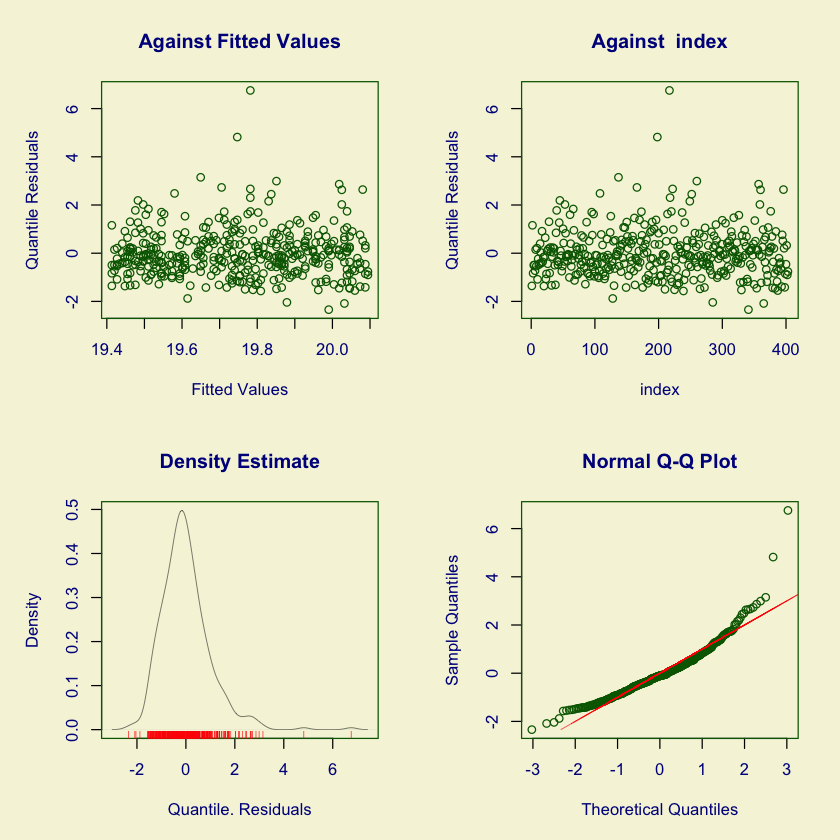

In [24]:
plot(mNo)

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.001198336 
                       variance   =  1.002305 
               coef. of skewness  =  0.8022175 
               coef. of kurtosis  =  5.386602 
Filliben correlation coefficient  =  0.982457 
******************************************************************


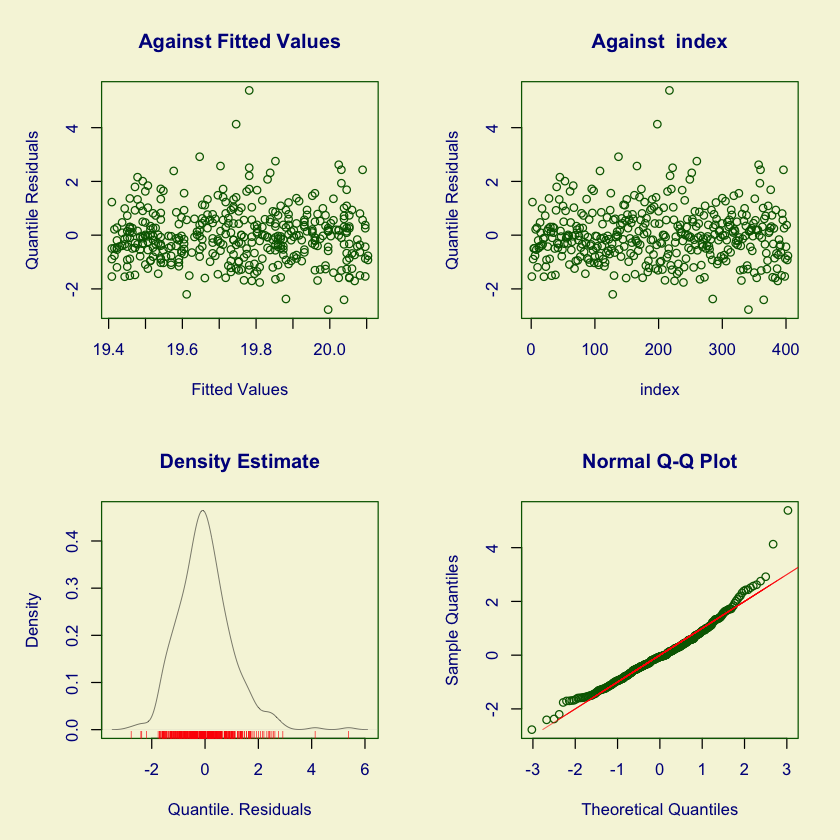

In [25]:
plot(mIg)

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.006564732 
                       variance   =  1.013184 
               coef. of skewness  =  0.1886973 
               coef. of kurtosis  =  3.67578 
Filliben correlation coefficient  =  0.9953437 
******************************************************************


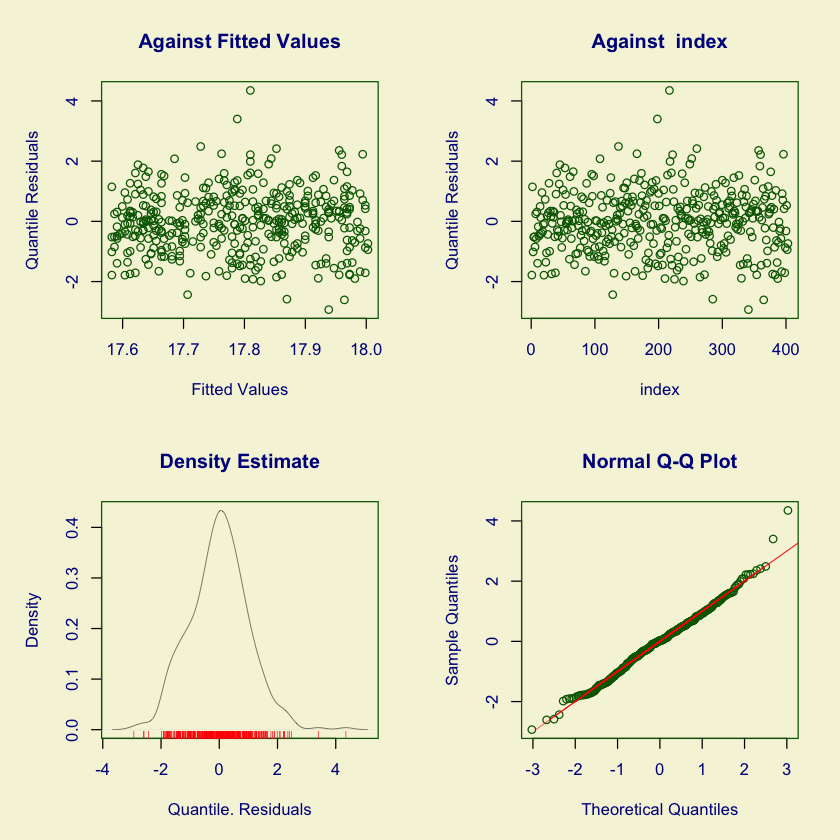

In [26]:
plot(mSep1)

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  0.06691666 
                       variance   =  0.9977436 
               coef. of skewness  =  0.4603805 
               coef. of kurtosis  =  2.909912 
Filliben correlation coefficient  =  0.9915071 
******************************************************************


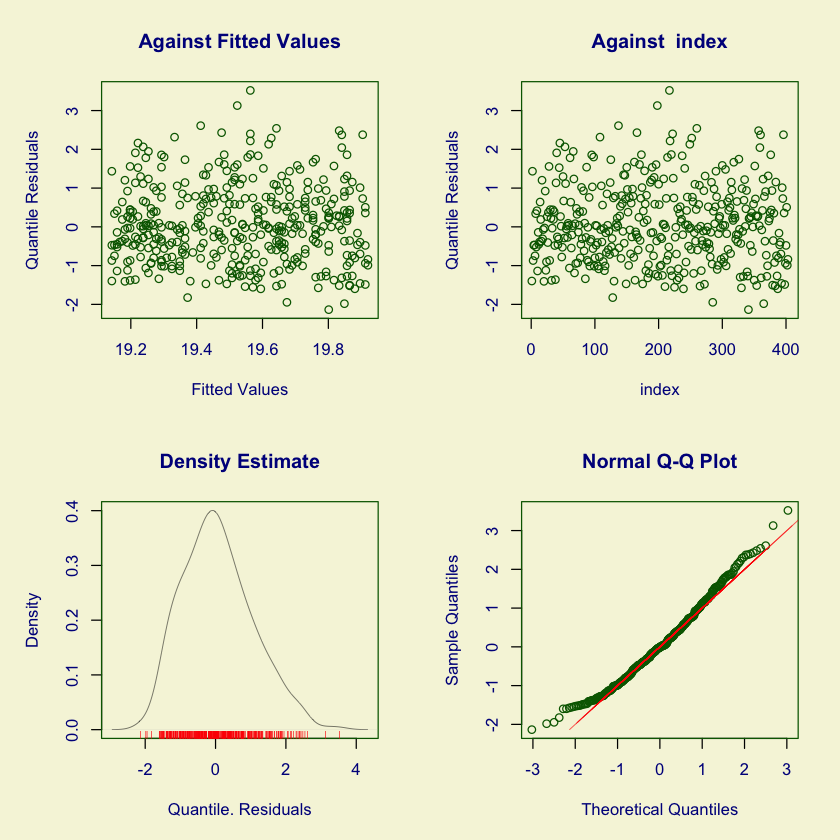

In [27]:
plot(mTf)

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  0.06807267 
                       variance   =  0.9941555 
               coef. of skewness  =  0.5567491 
               coef. of kurtosis  =  3.325439 
Filliben correlation coefficient  =  0.9888454 
******************************************************************


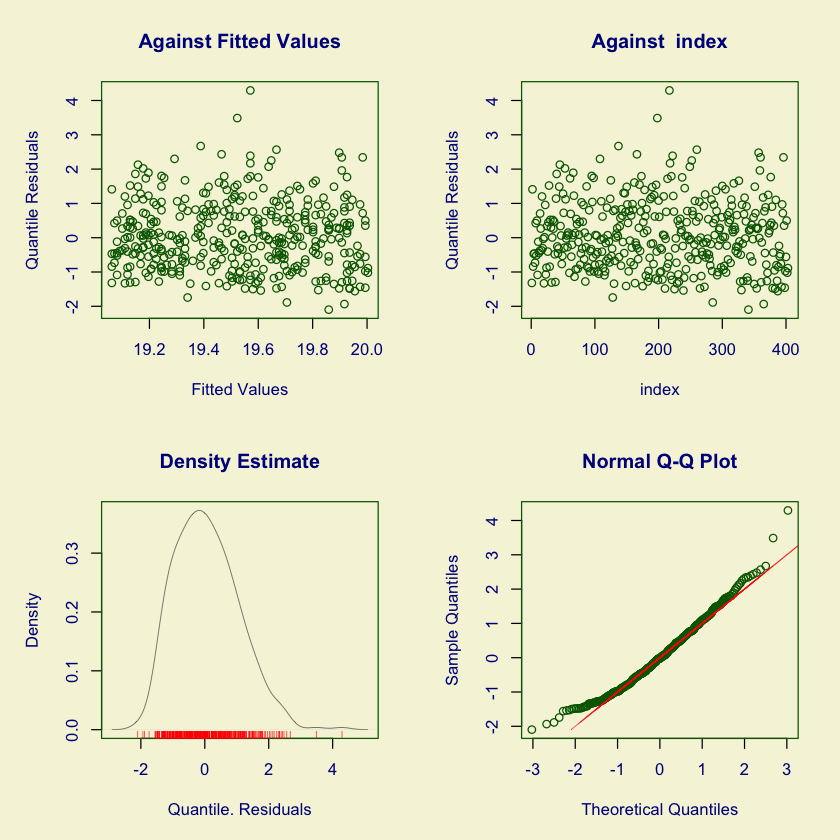

In [28]:
plot(mPe)

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -6.114349e-05 
                       variance   =  1.002872 
               coef. of skewness  =  0.003209276 
               coef. of kurtosis  =  2.97261 
Filliben correlation coefficient  =  0.9988337 
******************************************************************


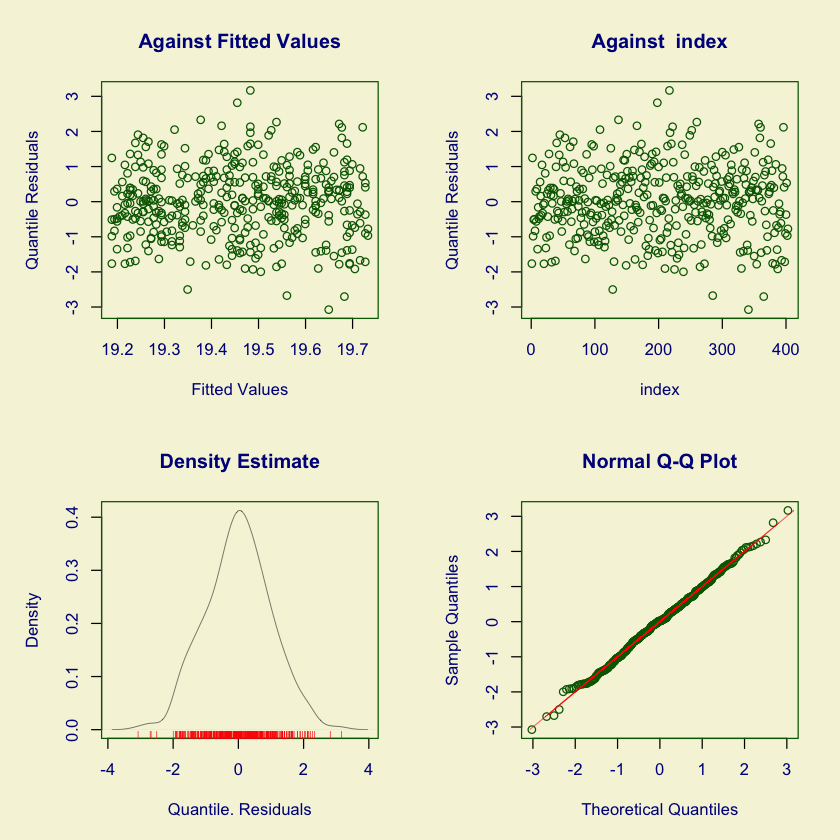

In [29]:
plot(mBct)

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.002949618 
                       variance   =  1.008113 
               coef. of skewness  =  0.05492427 
               coef. of kurtosis  =  3.272592 
Filliben correlation coefficient  =  0.9979897 
******************************************************************


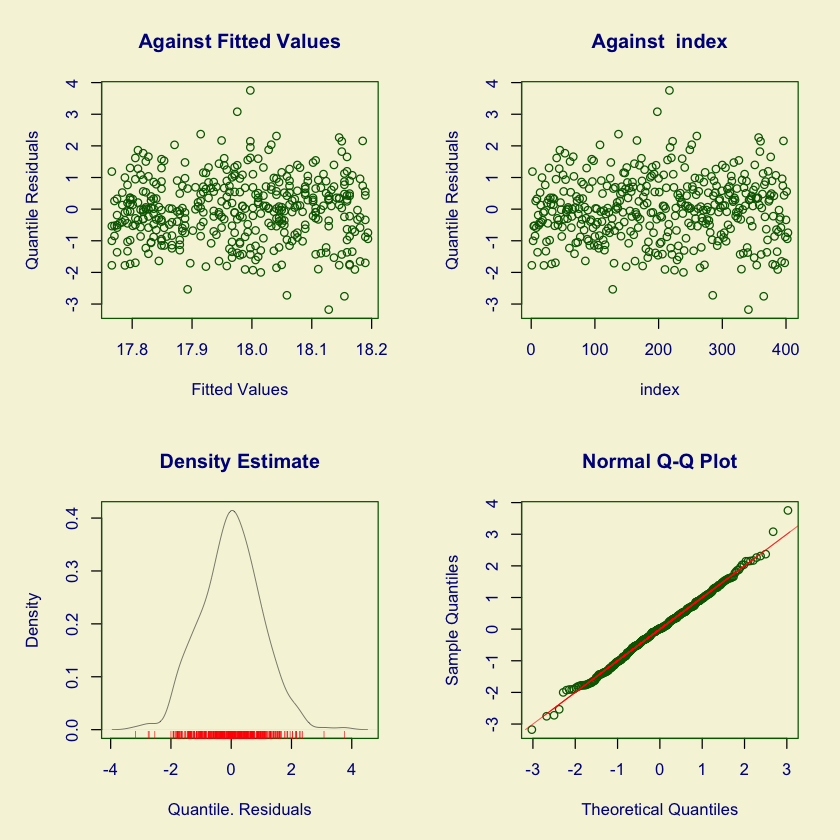

In [30]:
plot(mexGaus)

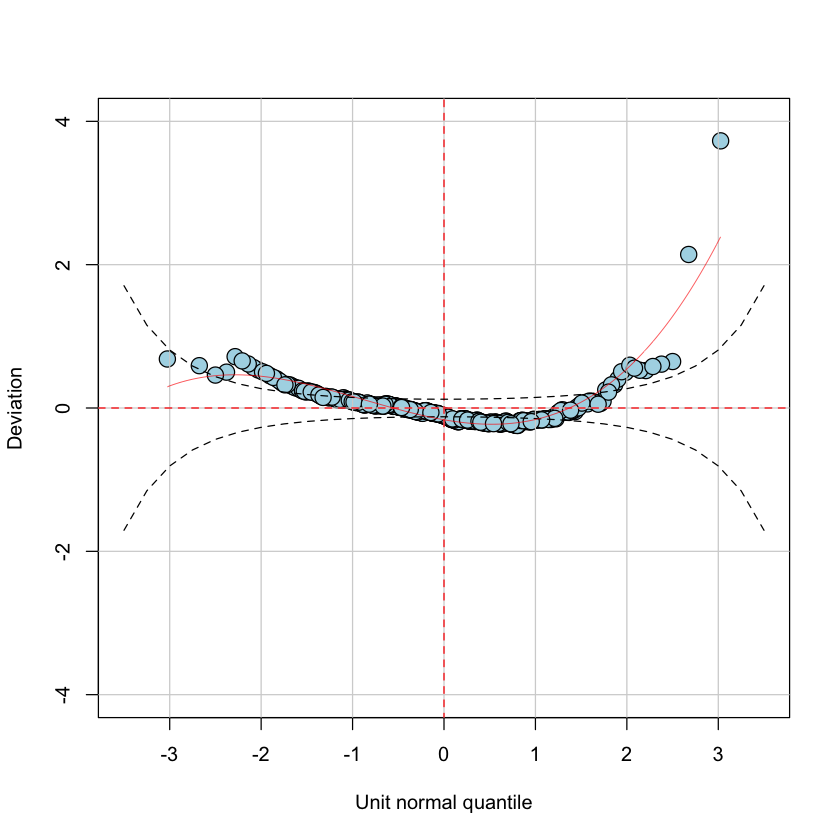

In [31]:
wp(mNo,xlim.all = 3.5, ylim.all = 4,cex=1.8,bg='lightblue')

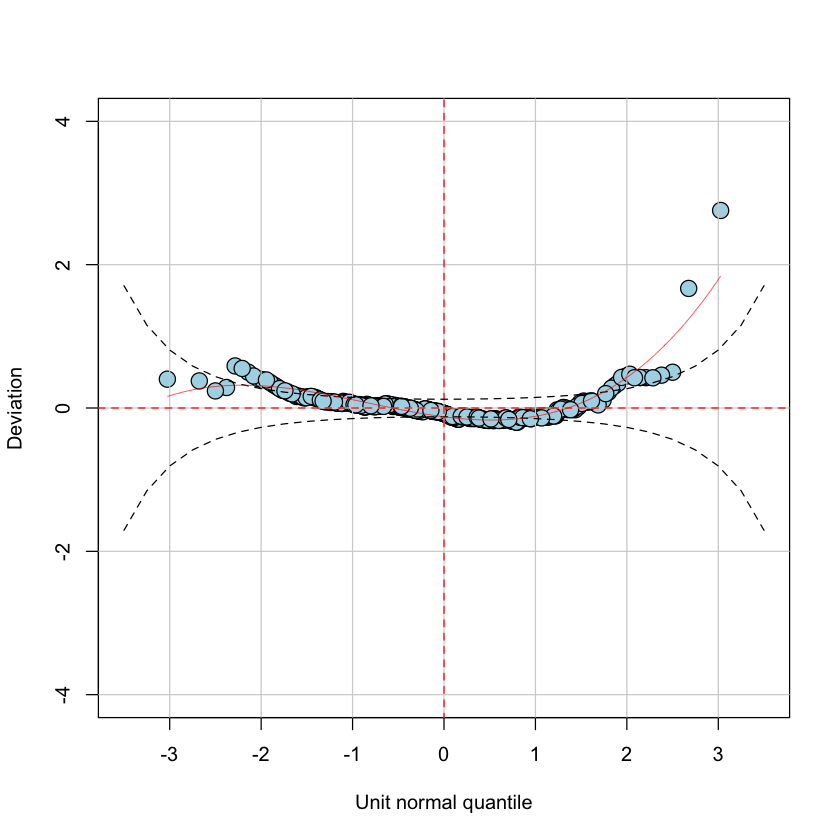

In [32]:
wp(mGa,xlim.all = 3.5, ylim.all = 4,cex=1.8,bg='lightblue')

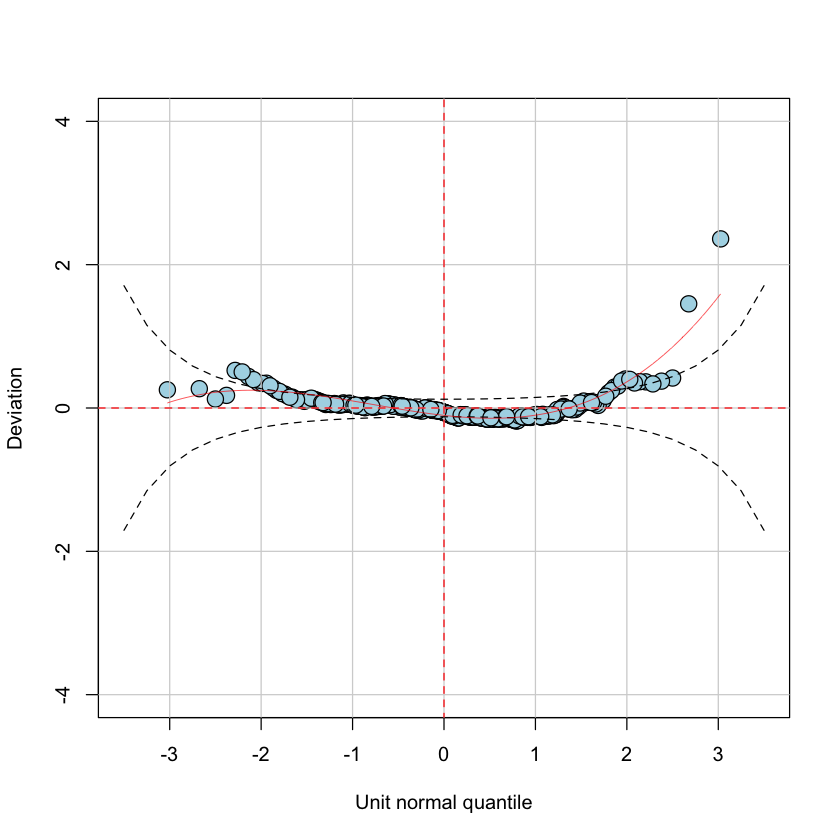

In [33]:
wp(mIg,xlim.all = 3.5, ylim.all = 4,cex=1.8,bg='lightblue')

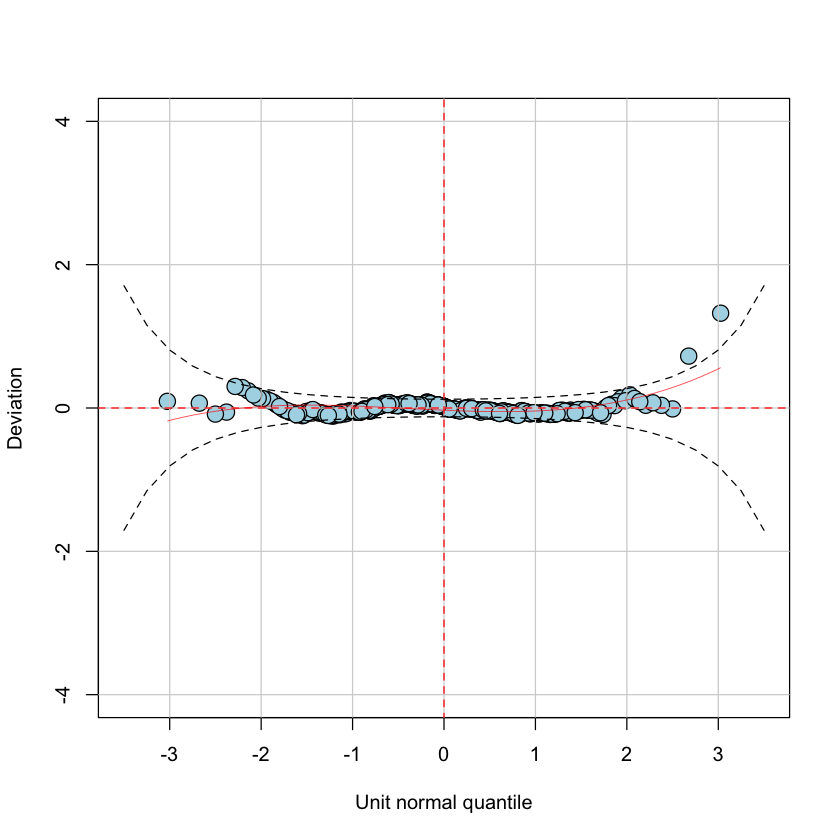

In [34]:
wp(mSep1,xlim.all = 3.5, ylim.all = 4,cex=1.8,bg='lightblue')

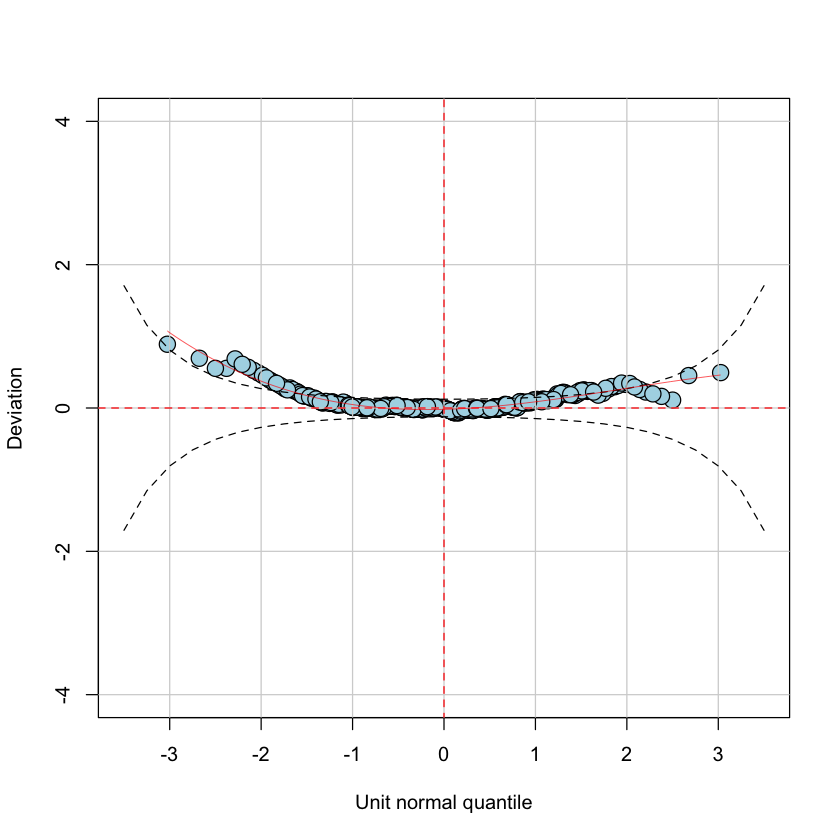

In [35]:
wp(mTf,xlim.all = 3.5, ylim.all = 4,cex=1.8,bg='lightblue')

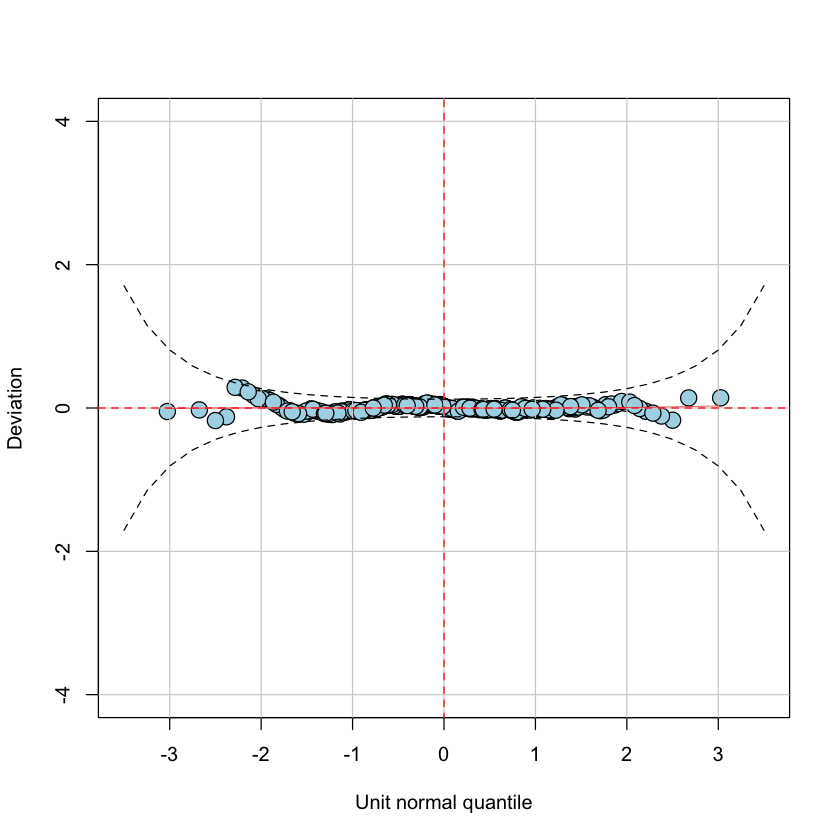

In [36]:
wp(mBct,xlim.all = 3.5, ylim.all = 4,cex=1.8,bg='lightblue')

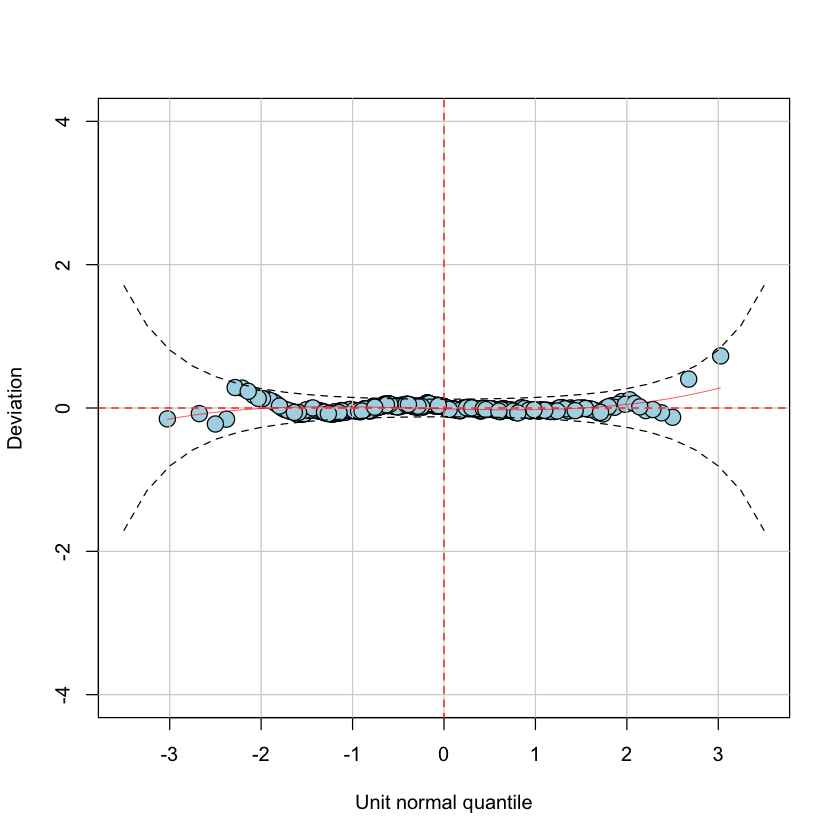

In [37]:
wp(mexGaus,xlim.all = 3.5, ylim.all = 4,cex=1.8,bg='lightblue')

[1] 17.94824

[1] 1.277047

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.00222054 
                       variance   =  1.005728 
               coef. of skewness  =  0.05915047 
               coef. of kurtosis  =  3.193805 
Filliben correlation coefficient  =  0.9982076 
******************************************************************
*******************************************************************
Family:  c("exGAUS", "ex-Gaussian") 

Call:  gamlssML(formula = bmi15, family = "exGAUS") 

Fitting method: "nlminb" 


Coefficient(s):
            Estimate  Std. Error   t value   Pr(>|t|)    
eta.mu    17.9482436   0.1491137 120.36620 < 2.22e-16 ***
eta.sigma  0.2445508   0.0805189   3.03718   0.002388 ** 
eta.nu     0.5881352   0.0899505   6.53843 6.2167e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Degrees of Freedom for the fit: 3 Residual Deg. of Freedom   400 
Global Devian

[1] 17.94824

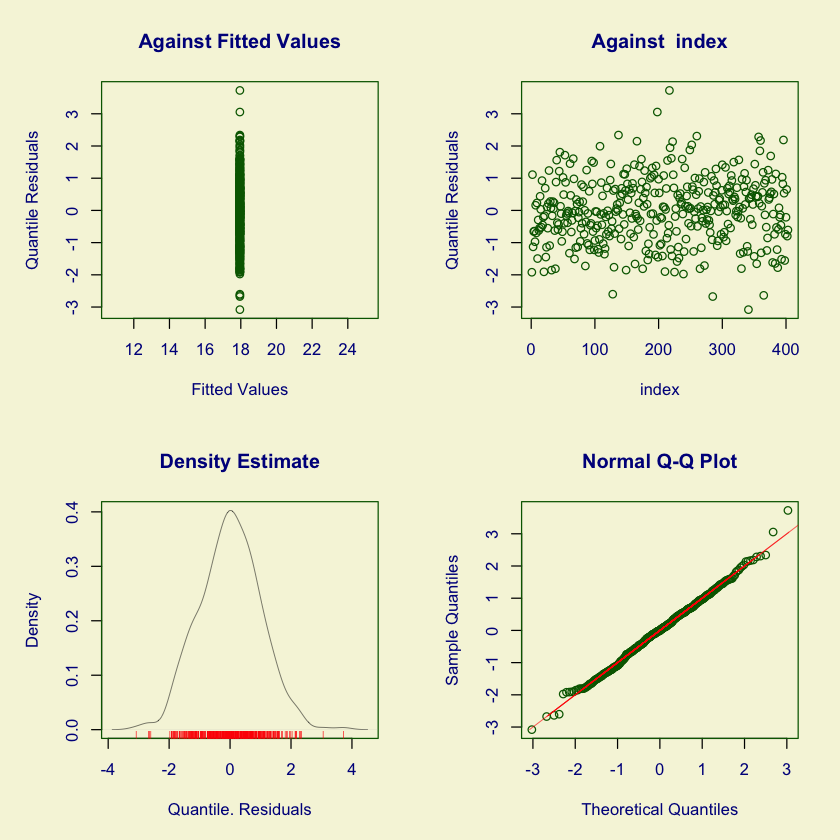

In [38]:
fitted(mexGAUS)[1]
fitted(mexGAUS,'sigma')[1]
plot(mexGAUS)
summary(mexGAUS)
coef(mexGAUS)